In [7]:
from PIL import Image
import struct
import math
import numpy as np

from matplotlib import pyplot as plt

%matplotlib inline

### this is what i want to get out

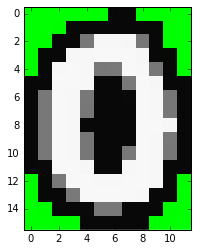

In [53]:
zero = Image.open('../resources/taikotemp/what_i_want/0.png', 'r')
plt.imshow(np.asarray(zero), interpolation ='none')
plt.show()

### this is what i have going so far

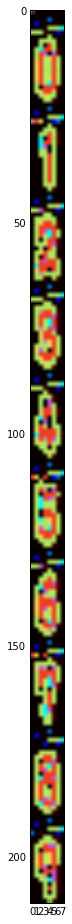

In [19]:
so_far = Image.open('../resources/taikotemp/what_i_want/score__ntf__score.ntf.png', 'r')
plt.figure(figsize=(6,16))
plt.imshow(np.asarray(so_far)[:211])
plt.show()

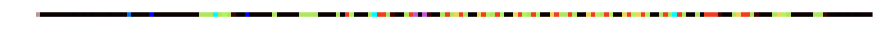

In [52]:
zero_array = np.asarray(so_far)[:23]
zero_array.shape
plt.figure(figsize=(15,5))
plt.axis('off')
plt.imshow(zero_array.reshape([1, 23 * 8, 4]), interpolation='none')
plt.show()

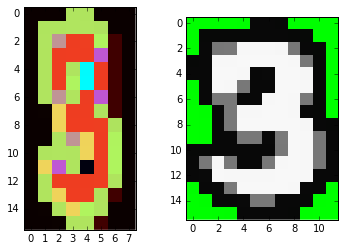

In [68]:
plt.figure(1)
plt.subplot(121)
plt.imshow(np.asarray(so_far)[69:85], interpolation ='none')
plt.subplot(122)
three = Image.open('../resources/taikotemp/what_i_want/3.png', 'r')
plt.imshow(np.asarray(three), interpolation ='none')
plt.show()

In [181]:
# let's duplicate some rows..
dubs = [(x, x) for x in range(1,7)]
dubs = [el for t in dubs for el in t]
dubs

[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6]

In [232]:
# i think the doubled rows are actually interpolated
# and it's not linear..
mean_mes = [(0, 2), (5, 7), (7, 9), (9, 11)]
mean_is = [1, 6, 8, 10]

In [162]:
lin_new_so_far = np.asarray(new_so_far.convert("L"))

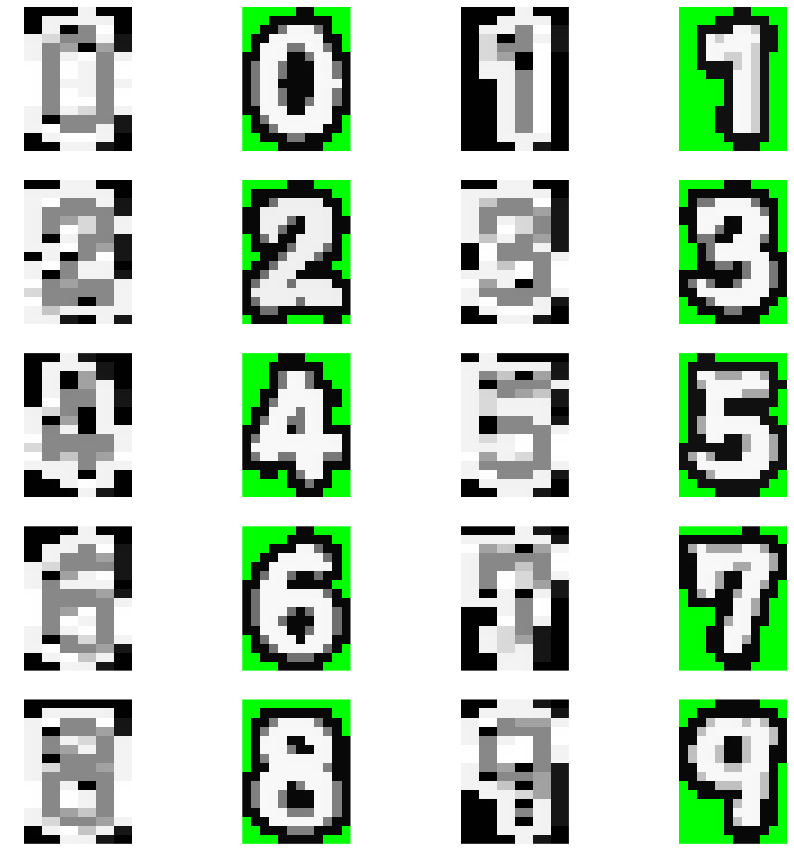

In [233]:
plt.figure(1)
plt.figure(figsize=(15,15))
for num in range(10):
    # from the ntf file
    plt.subplot(5, 4, 2 * num + 1)
    plt.axis('off')
    s = 6 + num * 21
    e = s + 16
    num_starto = lin_new_so_far[s:e]
    num_endo = num_starto.transpose()[dubs].transpose()
#     for i in range(len(mean_is)):
#         num_endo[:,mean_is[i]] = num_endo[:,mean_mes[i]].mean(axis=1)
    plt.imshow(num_endo, interpolation='none', cmap='gray')
    # from the mask
    plt.subplot(5, 4, 2 * num + 2)
    plt.axis('off')
    num_fname = '../resources/taikotemp/what_i_want/{}.png'.format(num)
    num_mask = Image.open(num_fname, 'r')
    plt.imshow(num_mask, interpolation='none')
plt.show()

whatever, i already have the masks from previous work, let's just extract from the files themselves as an exercise

In [236]:
fname = "../resources/taikotemp/what_i_want/ntf_files/score__ntf__score.ntf"

with open(fname, "rb") as binary_file:
    # Read the whole file at once
    bin_data = binary_file.read()


In [243]:
# we know that the format is 4bpp, 4 bits per pixel
bin_data[:4]

b'\n\x00\x00\x00'

In [306]:
a = np.array([])
ofs = 0
pixel_mask = (1 << 4) - 1
for i, ofs in enumerate(range(0, len(bin_data) - 32 * 8, 32)):
    pixels = []
    for i_row in range(8):
        for i_byte in range(32):
            pos = ofs + i_row*(32) + i_byte
            byte = bin_data[pos]
            for i_pixel in range(4):
                # decode one pixel
                pixel = (byte >> (4 * i_pixel)) & pixel_mask
                pixels.append(pixel)
    a = np.insert(a, i, pixels, 0)

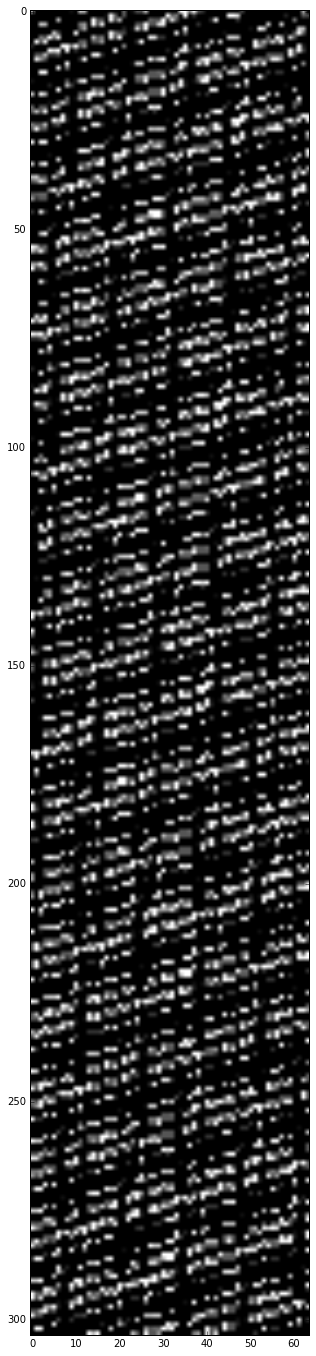

In [307]:
plt.figure(figsize=(5,25))
plt.imshow(a.reshape(64, -1).transpose(), cmap='gray')